Importing the Library

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Database connection parameters

In [2]:

db_config = {
    'user': 'root',
    'password': 'iampratik@5995', 
    'host': 'localhost',
    'database': 'ecommerce'
}

# Creating Connection and Cursor

In [3]:
cursor = None
connection = None

# Establish a connection to the database
connection = mysql.connector.connect(**db_config)
# Create a cursor object to execute SQL queries
cursor = connection.cursor()    
    

Print the first 5 records from each table


In [4]:
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])


print("Customer Data:")
print(customer_data.head())
print("\nProduct Data:")
print(product_data.head())
print("\nOrder Data:")
print(order_data.head())


Customer Data:
  customer_id          name       city                    email    phone_no  \
0        C001    Ravi Kumar      Delhi    ravi.kumar@example.in  9812345678   
1        C002  Anita Sharma     Mumbai  anita.sharma@example.in  9823456789   
2        C003  Vikram Singh  Bangalore  vikram.singh@example.in  9834567890   
3        C004  Suresh Patil       Pune  suresh.patil@example.in  9845678901   
4        C005   Priya Menon    Chennai   priya.menon@example.in  9856789012   

           address  pin_code  
0   23 Ashok Nagar    110018  
1  56 Marine Drive    400002  
2       12 MG Road    560001  
3       78 FC Road    411004  
4       34 T Nagar    600017  

Product Data:
  product_id product_name     category      sub_category  original_price  \
0       P001       Laptop  Electronics         Computers         70000.0   
1       P002   Smartphone  Electronics     Mobile Phones         40000.0   
2       P003       Tablet  Electronics         Computers         30000.0   
3    

 “Finding information about data such as null value column names and data types.”

In [5]:

print("Customer Data:")
print(customer_data.info()) 
print("\nProduct Data:")
print(product_data.info())  
print("\nOrder Data:")
print(order_data.info())  


Customer Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  100 non-null    object
 1   name         100 non-null    object
 2   city         100 non-null    object
 3   email        100 non-null    object
 4   phone_no     100 non-null    object
 5   address      100 non-null    object
 6   pin_code     100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None

Product Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      100 non-null    object 
 1   product_name    100 non-null    object 
 2   category        100 non-null    object 
 3   sub_category    100 non-null    object 
 4   original_price  100 non-null    float64
 5   selling_price   100 

Check for missing values

In [6]:

print("Customer Data Missing Values:")
print(customer_data.isnull().sum())
print("\nProduct Data Missing Values:")
print(product_data.isnull().sum())
print("\nOrder Data Missing Values:")
print(order_data.isnull().sum())

Customer Data Missing Values:
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

Product Data Missing Values:
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

Order Data Missing Values:
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


# Data Cleaning

1.Convert Data Types: Ensure all columns are of the appropriate data type. For example, convert columns to the correct types as needed (e.g., converting a column to a date type if it contains date values).

2.Handle Outliers and Inconsistencies: Identify and address any outliers or inconsistencies in the data. For instance, remove rows where the ‘quantity’ column has negative values.

3.Drop Null Values: Identify and drop rows or columns with null values to ensure data integrity.

In [7]:
# 1:-
order_data['order_date'] = pd.to_datetime(order_data['order_date'], errors='coerce')
# 2:-
print("\nHandling Outliers in Order Data:")
order_data = order_data[order_data['quantity'] >= 0]
# 3:-
customer_data.dropna(inplace=True)
product_data.dropna(inplace=True)
order_data.dropna(inplace=True)



Handling Outliers in Order Data:


Again printing the data

In [8]:
print("Customer Data:")
print(customer_data.info()) 
print("\nProduct Data:")
print(product_data.info())  
print("\nOrder Data:")
print(order_data.info())  

Customer Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  100 non-null    object
 1   name         100 non-null    object
 2   city         100 non-null    object
 3   email        100 non-null    object
 4   phone_no     100 non-null    object
 5   address      100 non-null    object
 6   pin_code     100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None

Product Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      100 non-null    object 
 1   product_name    100 non-null    object 
 2   category        100 non-null    object 
 3   sub_category    100 non-null    object 
 4   original_price  100 non-null    float64
 5   selling_price   100 

# Identifying the total number of customers city-wise.

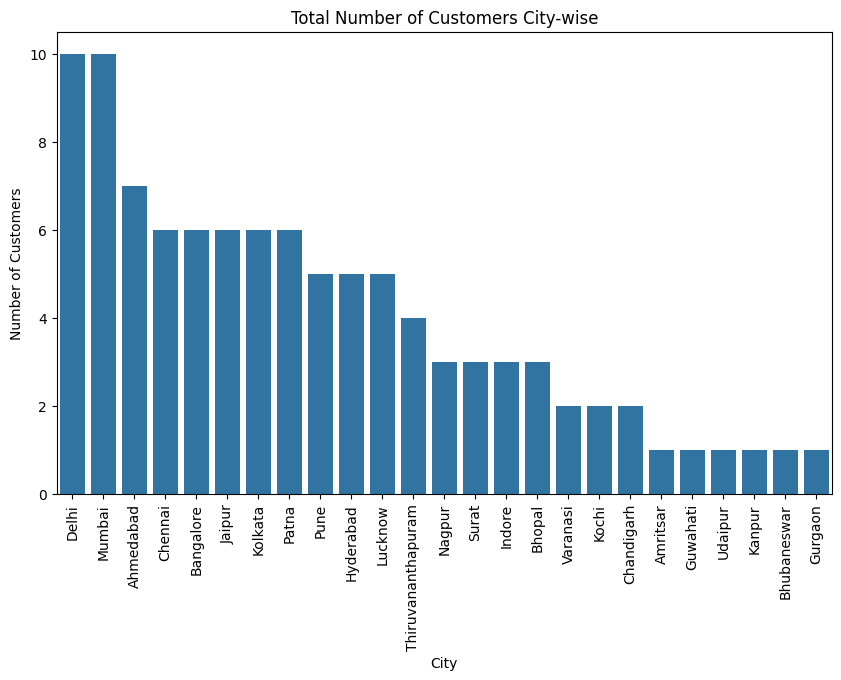

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='city', order=customer_data['city'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()

# Identifying the most frequent customers based on their order history.

In [4]:
# Aggregate order data to count the number of orders per customer
customer_order_counts = order_data['customer_id'].value_counts().reset_index()
customer_order_counts.columns = ['customer_id', 'order_count']

# Merge with customer_data to get customer names
customer_data_subset = customer_data[['customer_id', 'name']]
customer_order_counts = pd.merge(customer_order_counts, customer_data_subset, on='customer_id')

# Sort customers by order count and get the top 10
top_customers = customer_order_counts.sort_values(by='order_count', ascending=False).head(10)

# Create the vertical count plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_customers, x='customer_id', y='order_count', palette='viridis')
plt.title('Top 10 Most Frequent Customers Based on Order Count')
plt.xlabel('Customer id')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  
plt.show()


NameError: name 'order_data' is not defined

# Total Number of Products Available by Category

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\487780603.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_category_counts, x='category', y='product_count', palette='viridis')


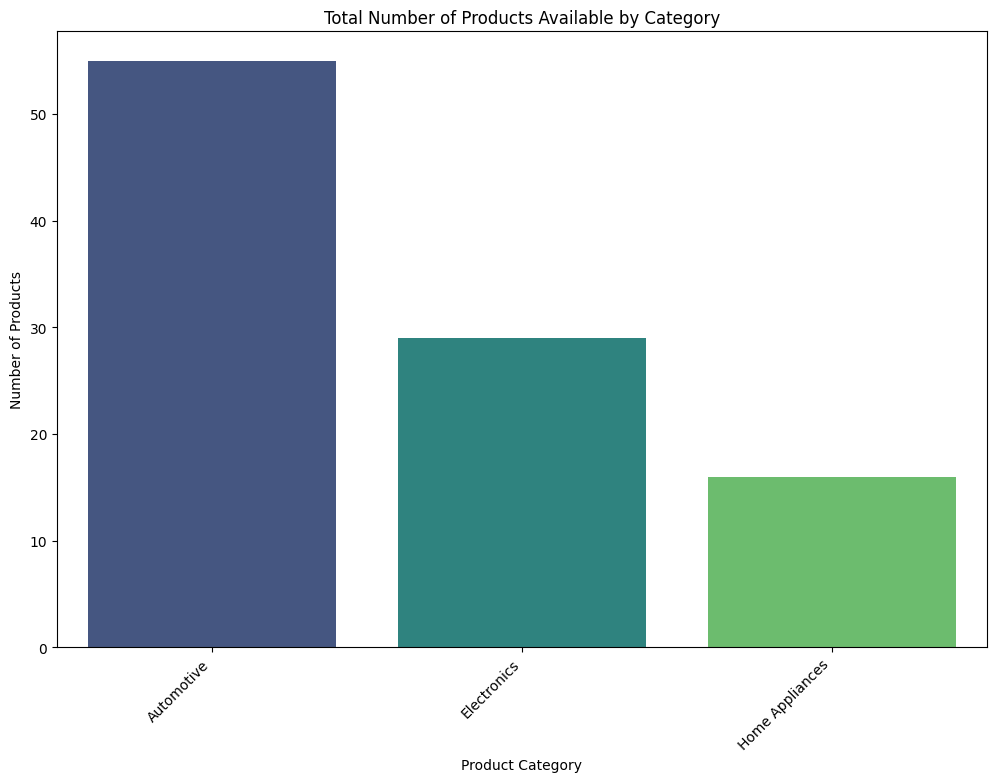

In [11]:
# Aggregate product data to count the number of products per category
product_category_counts = product_data['category'].value_counts().reset_index()
product_category_counts.columns = ['category', 'product_count']

# Create the count plot
plt.figure(figsize=(12, 8))
sns.barplot(data=product_category_counts, x='category', y='product_count', palette='viridis')
plt.title('Total Number of Products Available by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of Products Across Sub-Categories

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\3685397464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_category_counts, x='sub_category', y='product_count', palette='viridis')


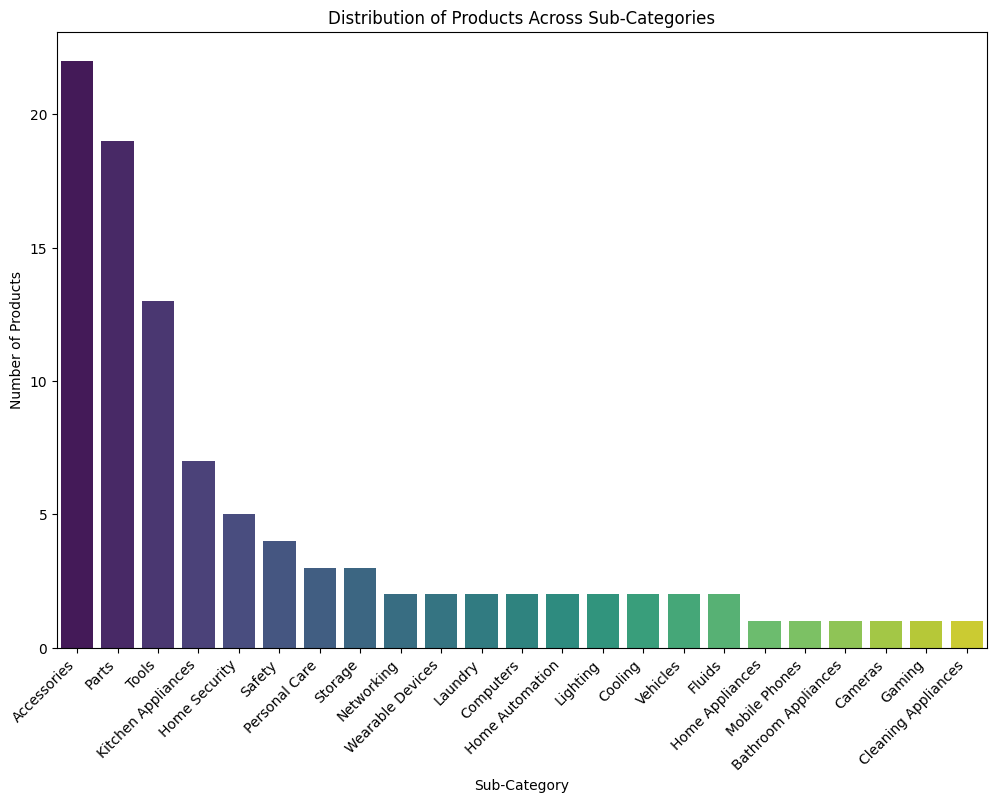

In [12]:
# Aggregate product data to count the number of products per sub-category
sub_category_counts = product_data['sub_category'].value_counts().reset_index()
sub_category_counts.columns = ['sub_category', 'product_count']

# Create the count plot
plt.figure(figsize=(12, 8))
sns.barplot(data=sub_category_counts, x='sub_category', y='product_count', palette='viridis')
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right') 
plt.show()

# Identifying products with low stock levels.

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\846608225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_stock_df, x='product_name', y='stock', palette='viridis')


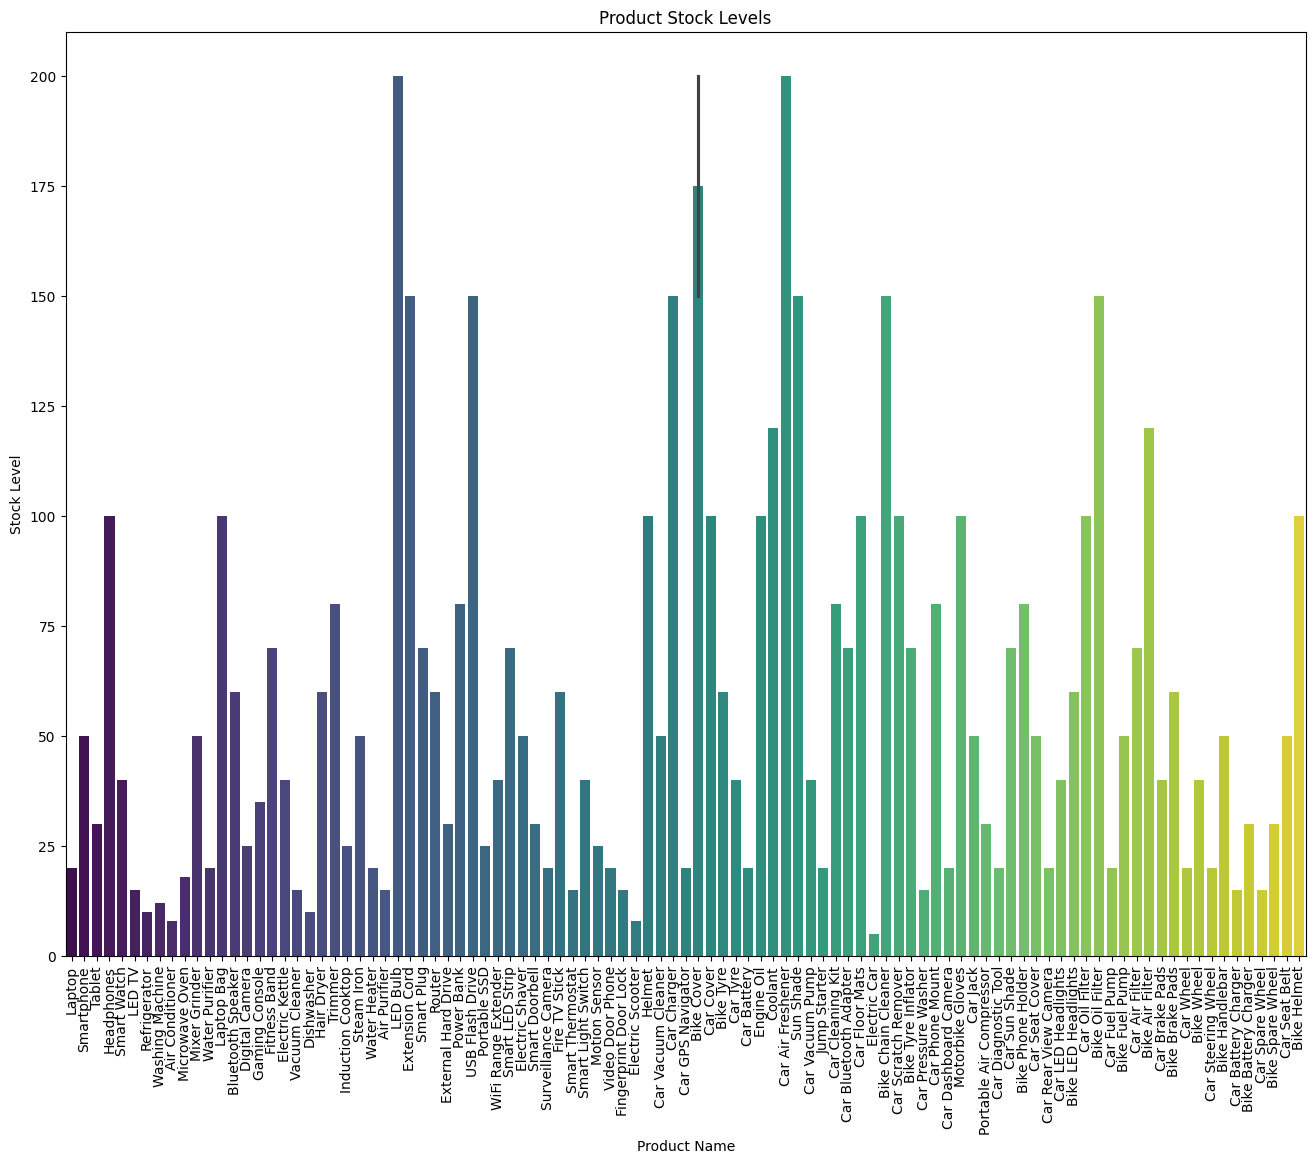

In [13]:


# Create a DataFrame with product names and stock levels
product_stock_df = product_data[['product_name', 'stock']]

# Create a larger, vertical bar plot
plt.figure(figsize=(16, 12))
sns.barplot(data=product_stock_df, x='product_name', y='stock', palette='viridis')
plt.title('Product Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.xticks(rotation=90)  
plt.show()


# Products with Low Stock Levels then threshold

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\3348647552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=low_stock_products, y='product_name', palette='viridis', order=low_stock_products['product_name'].value_counts().index)


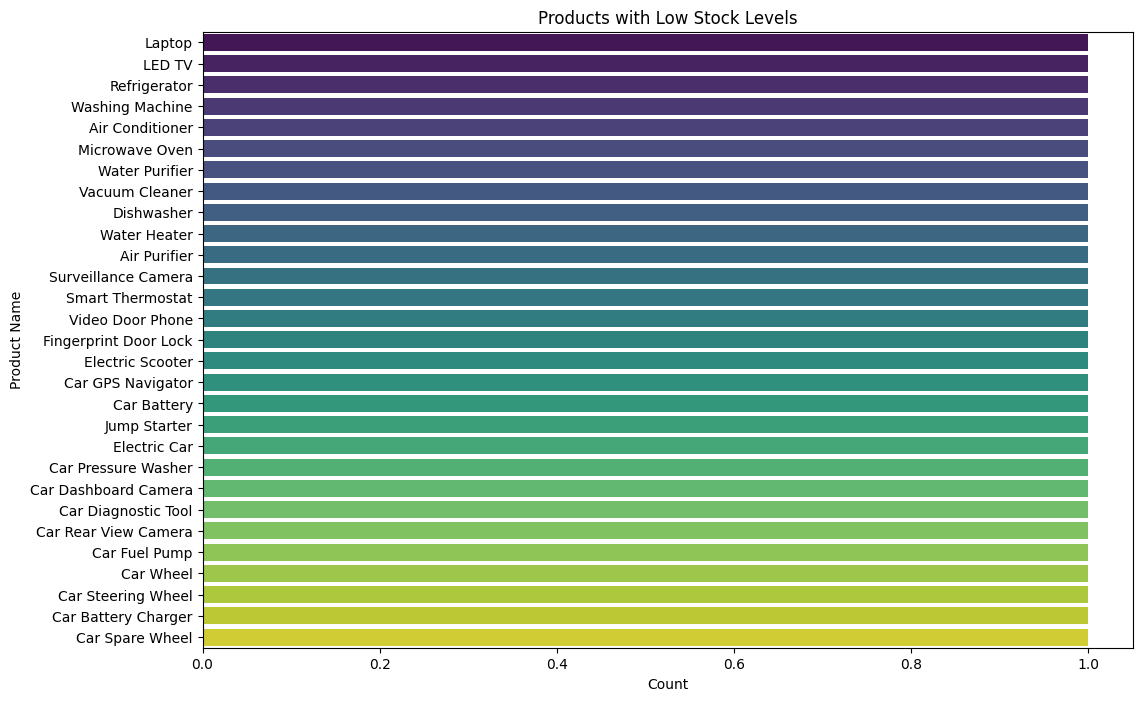

In [14]:
low_stock_threshold = 25

# Filter the products with stock levels below the threshold
low_stock_products = product_data[product_data['stock'] < low_stock_threshold]

# Create a count plot for low stock products
plt.figure(figsize=(12, 8))
sns.countplot(data=low_stock_products, y='product_name', palette='viridis', order=low_stock_products['product_name'].value_counts().index)
plt.title('Products with Low Stock Levels')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\3386752718.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_stats_df, x='Statistic', y='Value', palette='viridis')


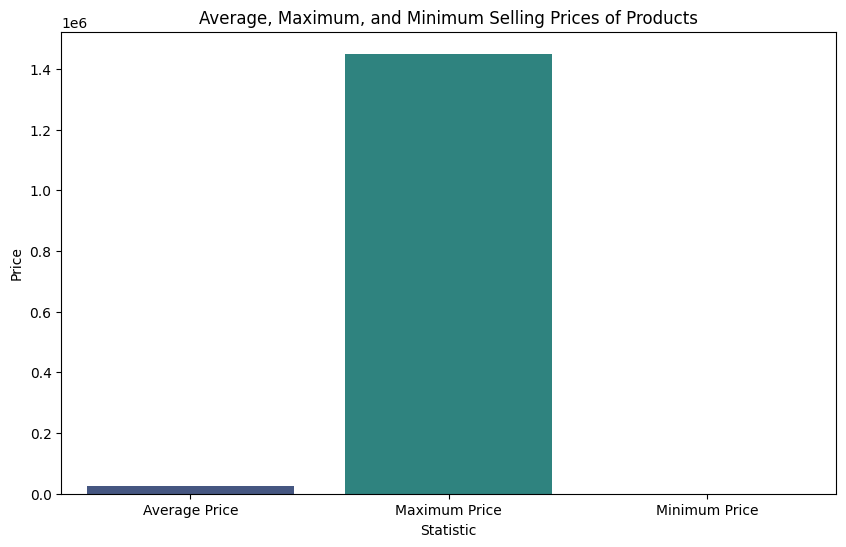

In [15]:
# Calculate statistics
price_stats = {
    'Statistic': ['Average Price', 'Maximum Price', 'Minimum Price'],
    'Value': [
        product_data['selling_price'].mean(),
        product_data['selling_price'].max(),
        product_data['selling_price'].min()
    ]
}

# Create a DataFrame for plotting
price_stats_df = pd.DataFrame(price_stats)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.barplot(data=price_stats_df, x='Statistic', y='Value', palette='viridis')
plt.title('Average, Maximum, and Minimum Selling Prices of Products')
plt.xlabel('Statistic')
plt.ylabel('Price')
plt.show()

# Calculate the top 10 orders product wise.

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\2716097048.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_name', y='order_count', palette='viridis')


  product_id  order_count      product_name
0       P038            4    Smart Doorbell
1       P034            4      Portable SSD
2       P041            4  Smart Thermostat
3       P072            3  Motorbike Gloves
4       P062            3  Car Cleaning Kit
5       P054            3          Car Tyre
6       P022            3           Trimmer
7       P099            3     Car Seat Belt
8       P012            2    Water Purifier
9       P029            2        Smart Plug


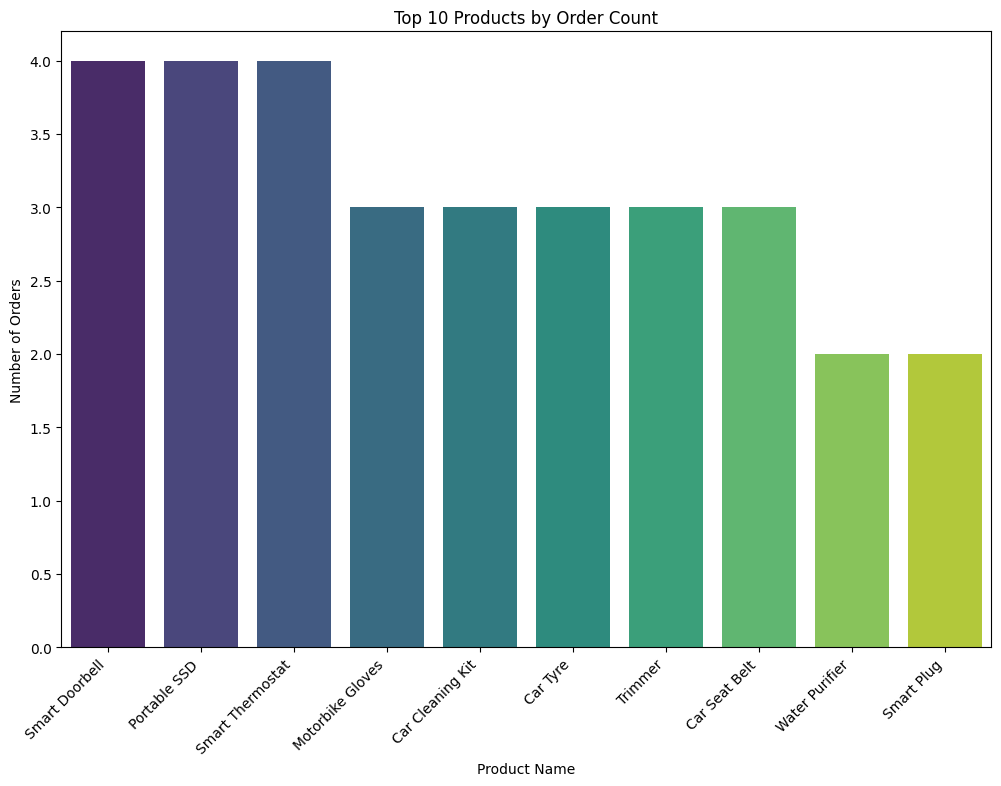

In [16]:
# Aggregate order data to count the number of orders per product
product_order_counts = order_data['product_id'].value_counts().reset_index()
product_order_counts.columns = ['product_id', 'order_count']

# Merge with product_data to get product names
product_data_subset = product_data[['product_id', 'product_name']]
product_order_counts = pd.merge(product_order_counts, product_data_subset, on='product_id')

# Sort products by order count and get the top 10
top_products = product_order_counts.sort_values(by='order_count', ascending=False).head(10)
print(top_products)
# Create the count plot 
plt.figure(figsize=(12, 8))
sns.barplot(data=top_products, x='product_name', y='order_count', palette='viridis')
plt.title('Top 10 Products by Order Count')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  
plt.show()

# Order status distribution

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\3800021887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_counts, x='order_status', y='order_count', palette='viridis')


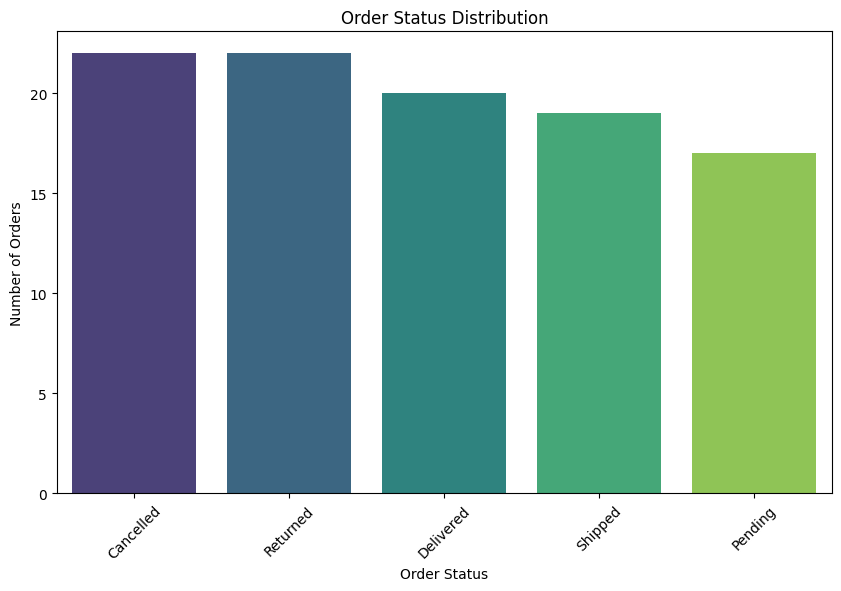

In [17]:
status_counts = order_data['order_status'].value_counts().reset_index()
status_counts.columns = ['order_status', 'order_count']

# Create the count plot
plt.figure(figsize=(10, 6))
sns.barplot(data=status_counts, x='order_status', y='order_count', palette='viridis')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Calculating total revenue product category wise percentage

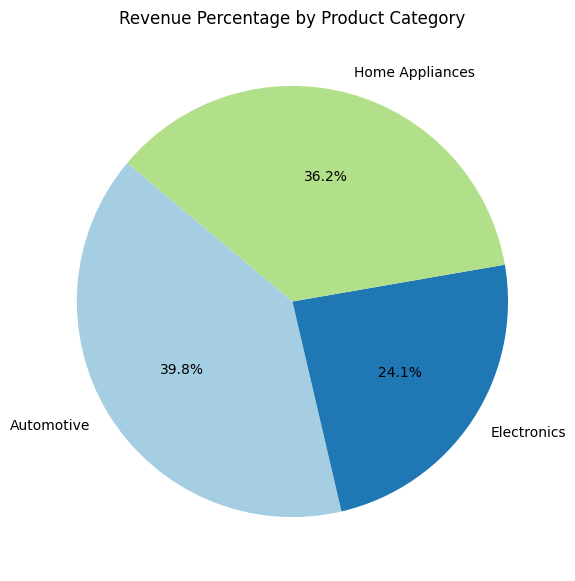

In [18]:
# Merge order data with product data to get categories
merged_df = pd.merge(order_data, product_data, on='product_id')

# Calculate total revenue by product category
revenue_by_category = merged_df.groupby('category')['total_price'].sum().reset_index()

# Calculate percentage of total revenue by category
revenue_by_category['percentage'] = (revenue_by_category['total_price'] / revenue_by_category['total_price'].sum()) * 100

# Create the pie plot
plt.figure(figsize=(10, 7))
plt.pie(revenue_by_category['percentage'], labels=revenue_by_category['category'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(revenue_by_category))))
plt.title('Revenue Percentage by Product Category')
plt.show()

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\3028611882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_product, x='product_name', y='total_price', palette='viridis')


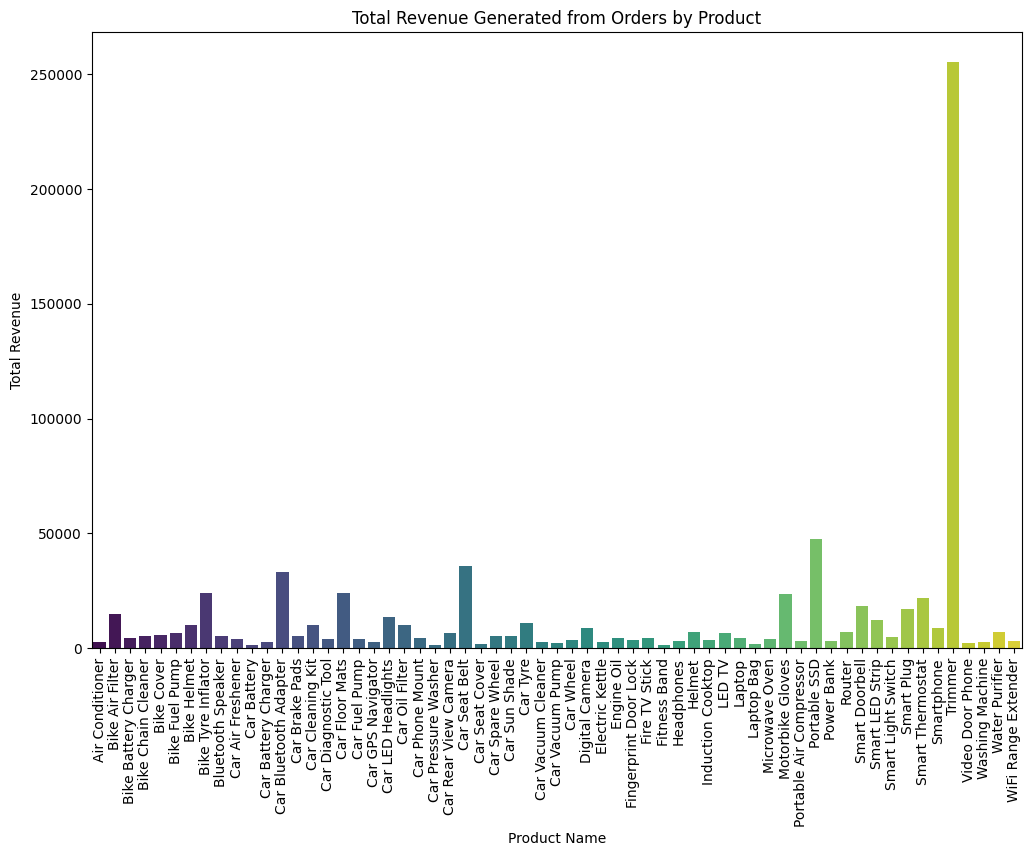

In [19]:


# Merge order data with product data to get product names
merged_df = pd.merge(order_data, product_data, on='product_id')

# Calculate total revenue by product
revenue_by_product = merged_df.groupby('product_name')['total_price'].sum().reset_index()

# Create the vertical bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=revenue_by_product, x='product_name', y='total_price', palette='viridis')
plt.title('Total Revenue Generated from Orders by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Most preferred payment modes

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\1868067666.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_mode_counts, x='payment_mode', y='count', palette='viridis')


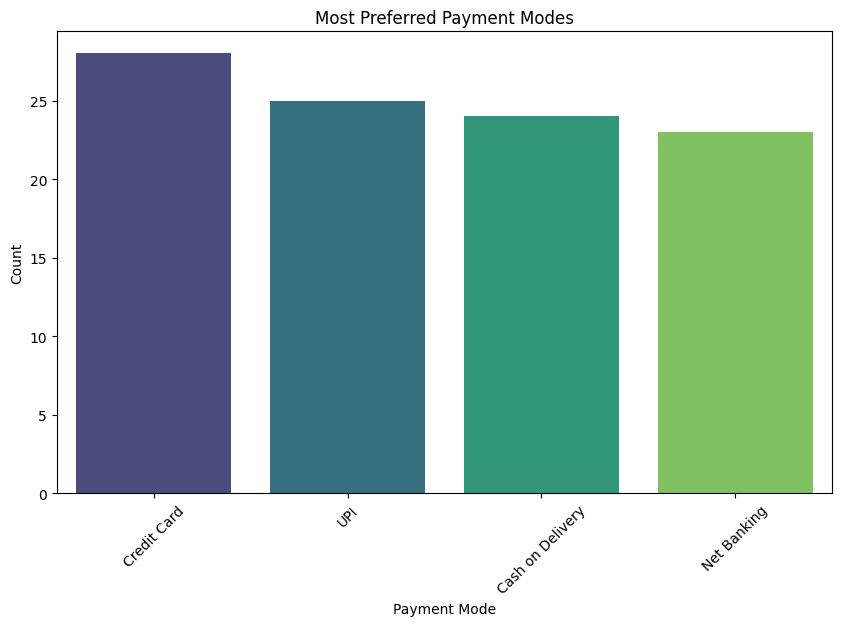

In [20]:
# Calculate the count of each payment mode
payment_mode_counts = order_data['payment_mode'].value_counts().reset_index()
payment_mode_counts.columns = ['payment_mode', 'count']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_mode_counts, x='payment_mode', y='count', palette='viridis')
plt.title('Most Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Month and year wise total sales

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\1314562932.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


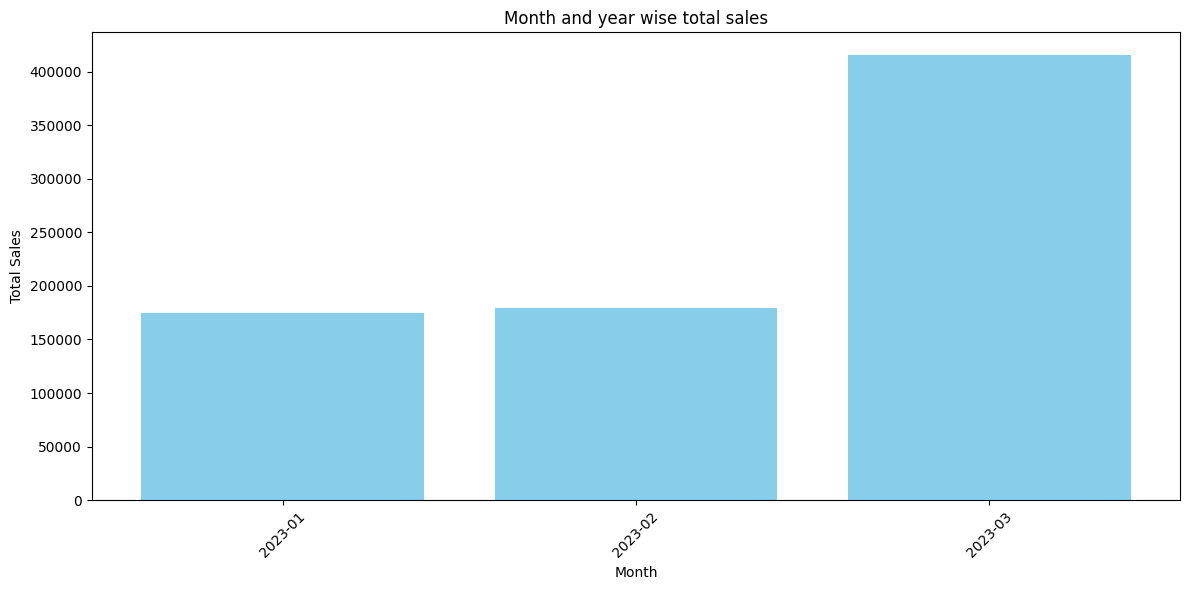

In [21]:
# Query to fetch month-wise total sales
query = """
SELECT DATE_FORMAT(order_date, '%Y-%m') AS month,
       SUM(total_price) AS total_sales
FROM order_details
GROUP BY month
ORDER BY month;
"""

# Load data into DataFrame
df = pd.read_sql(query, connection)



# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df['month'], df['total_sales'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month and year wise total sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

# Identifying peak order date.

C:\Users\iampr\AppData\Local\Temp\ipykernel_12512\117361913.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


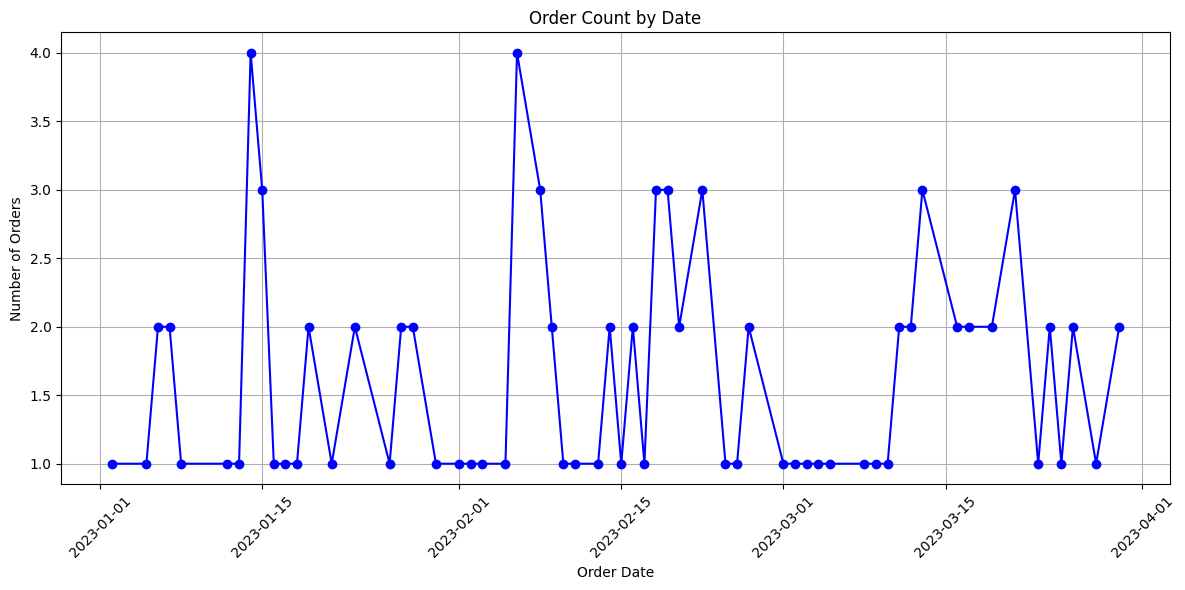

In [22]:
# Query to fetch order dates
query = "SELECT order_date, COUNT(*) AS order_count FROM order_details GROUP BY order_date ORDER BY order_date"

# Fetch data into a DataFrame
df = pd.read_sql(query, connection)


# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['order_date'], df['order_count'], marker='o', linestyle='-', color='b')
plt.title('Order Count by Date')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()